# Bike Sharing Assignment

#### Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Understanding the Data - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
bike_data_df = pd.read_csv("day.csv")

In [3]:
bike_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


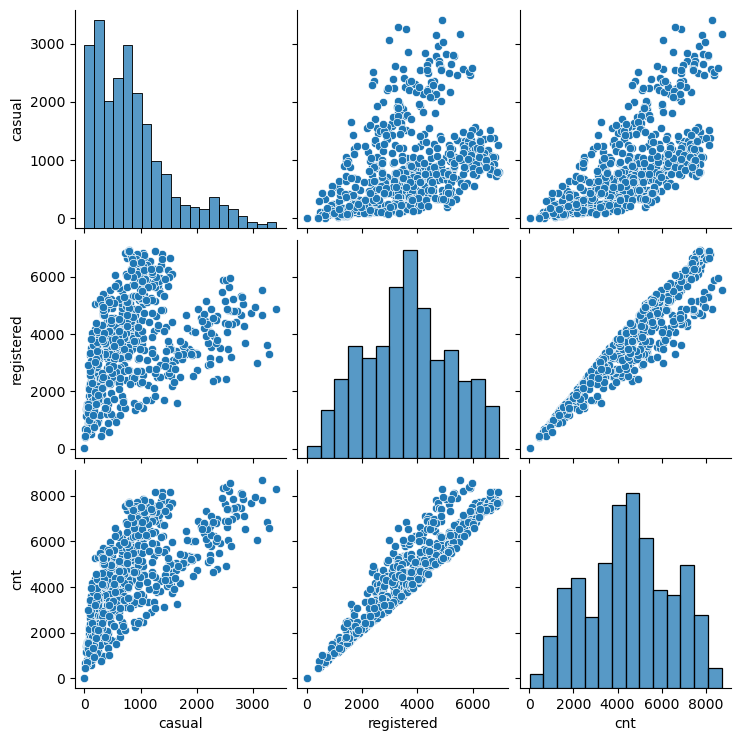

In [6]:
sns.pairplot(bike_data_df, vars=['casual', 'registered', 'cnt'])
plt.show()

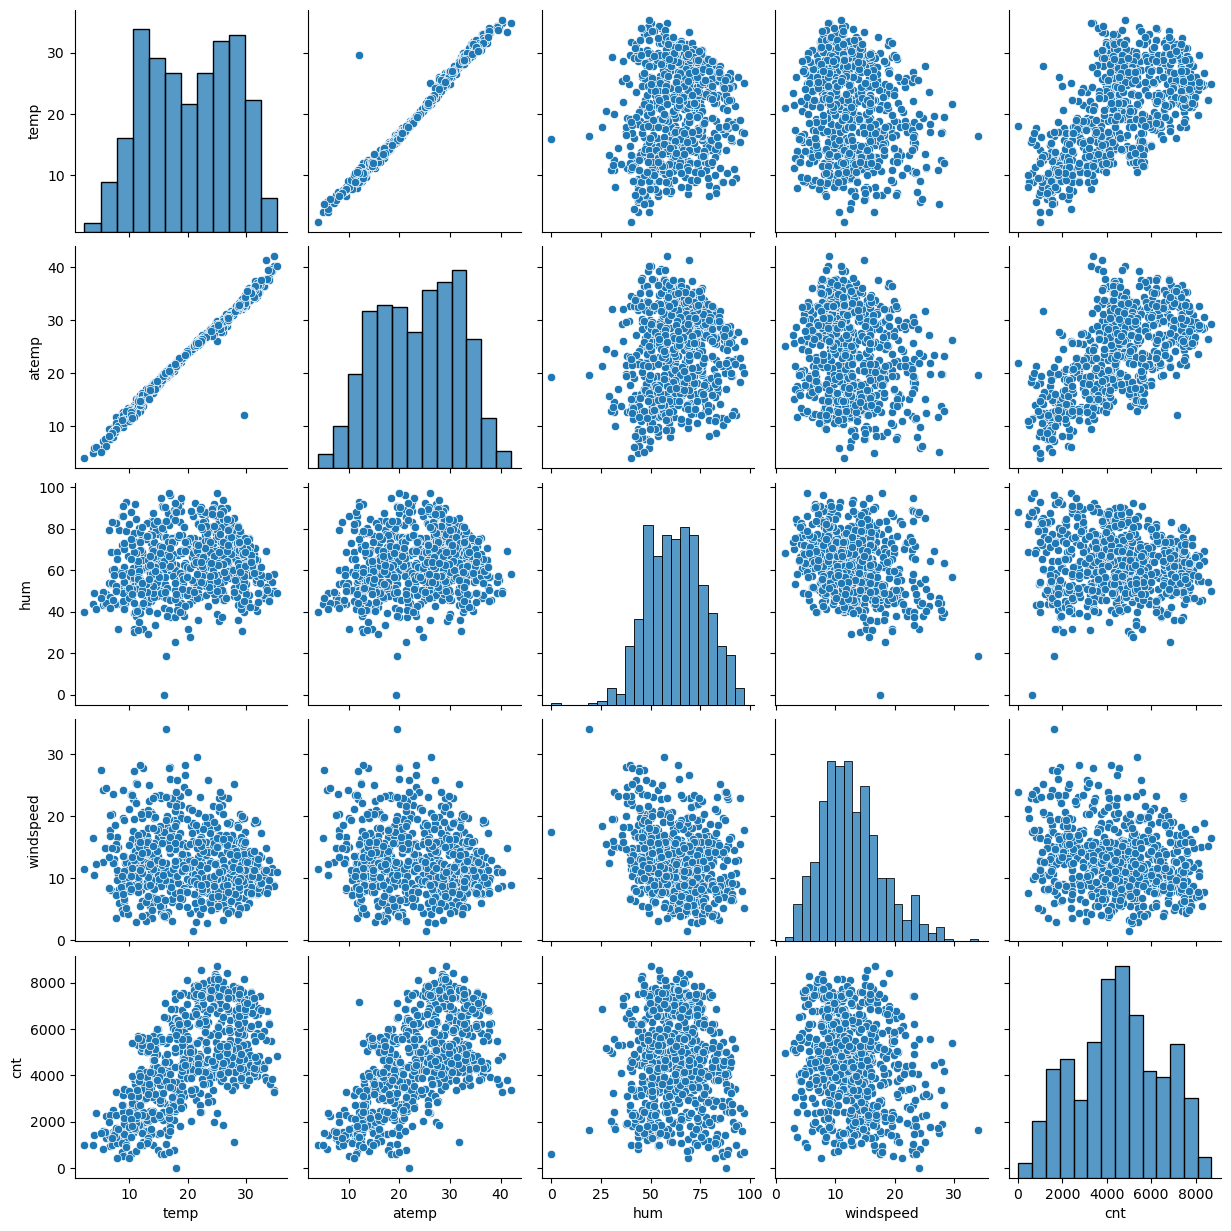

In [7]:
sns.pairplot(bike_data_df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

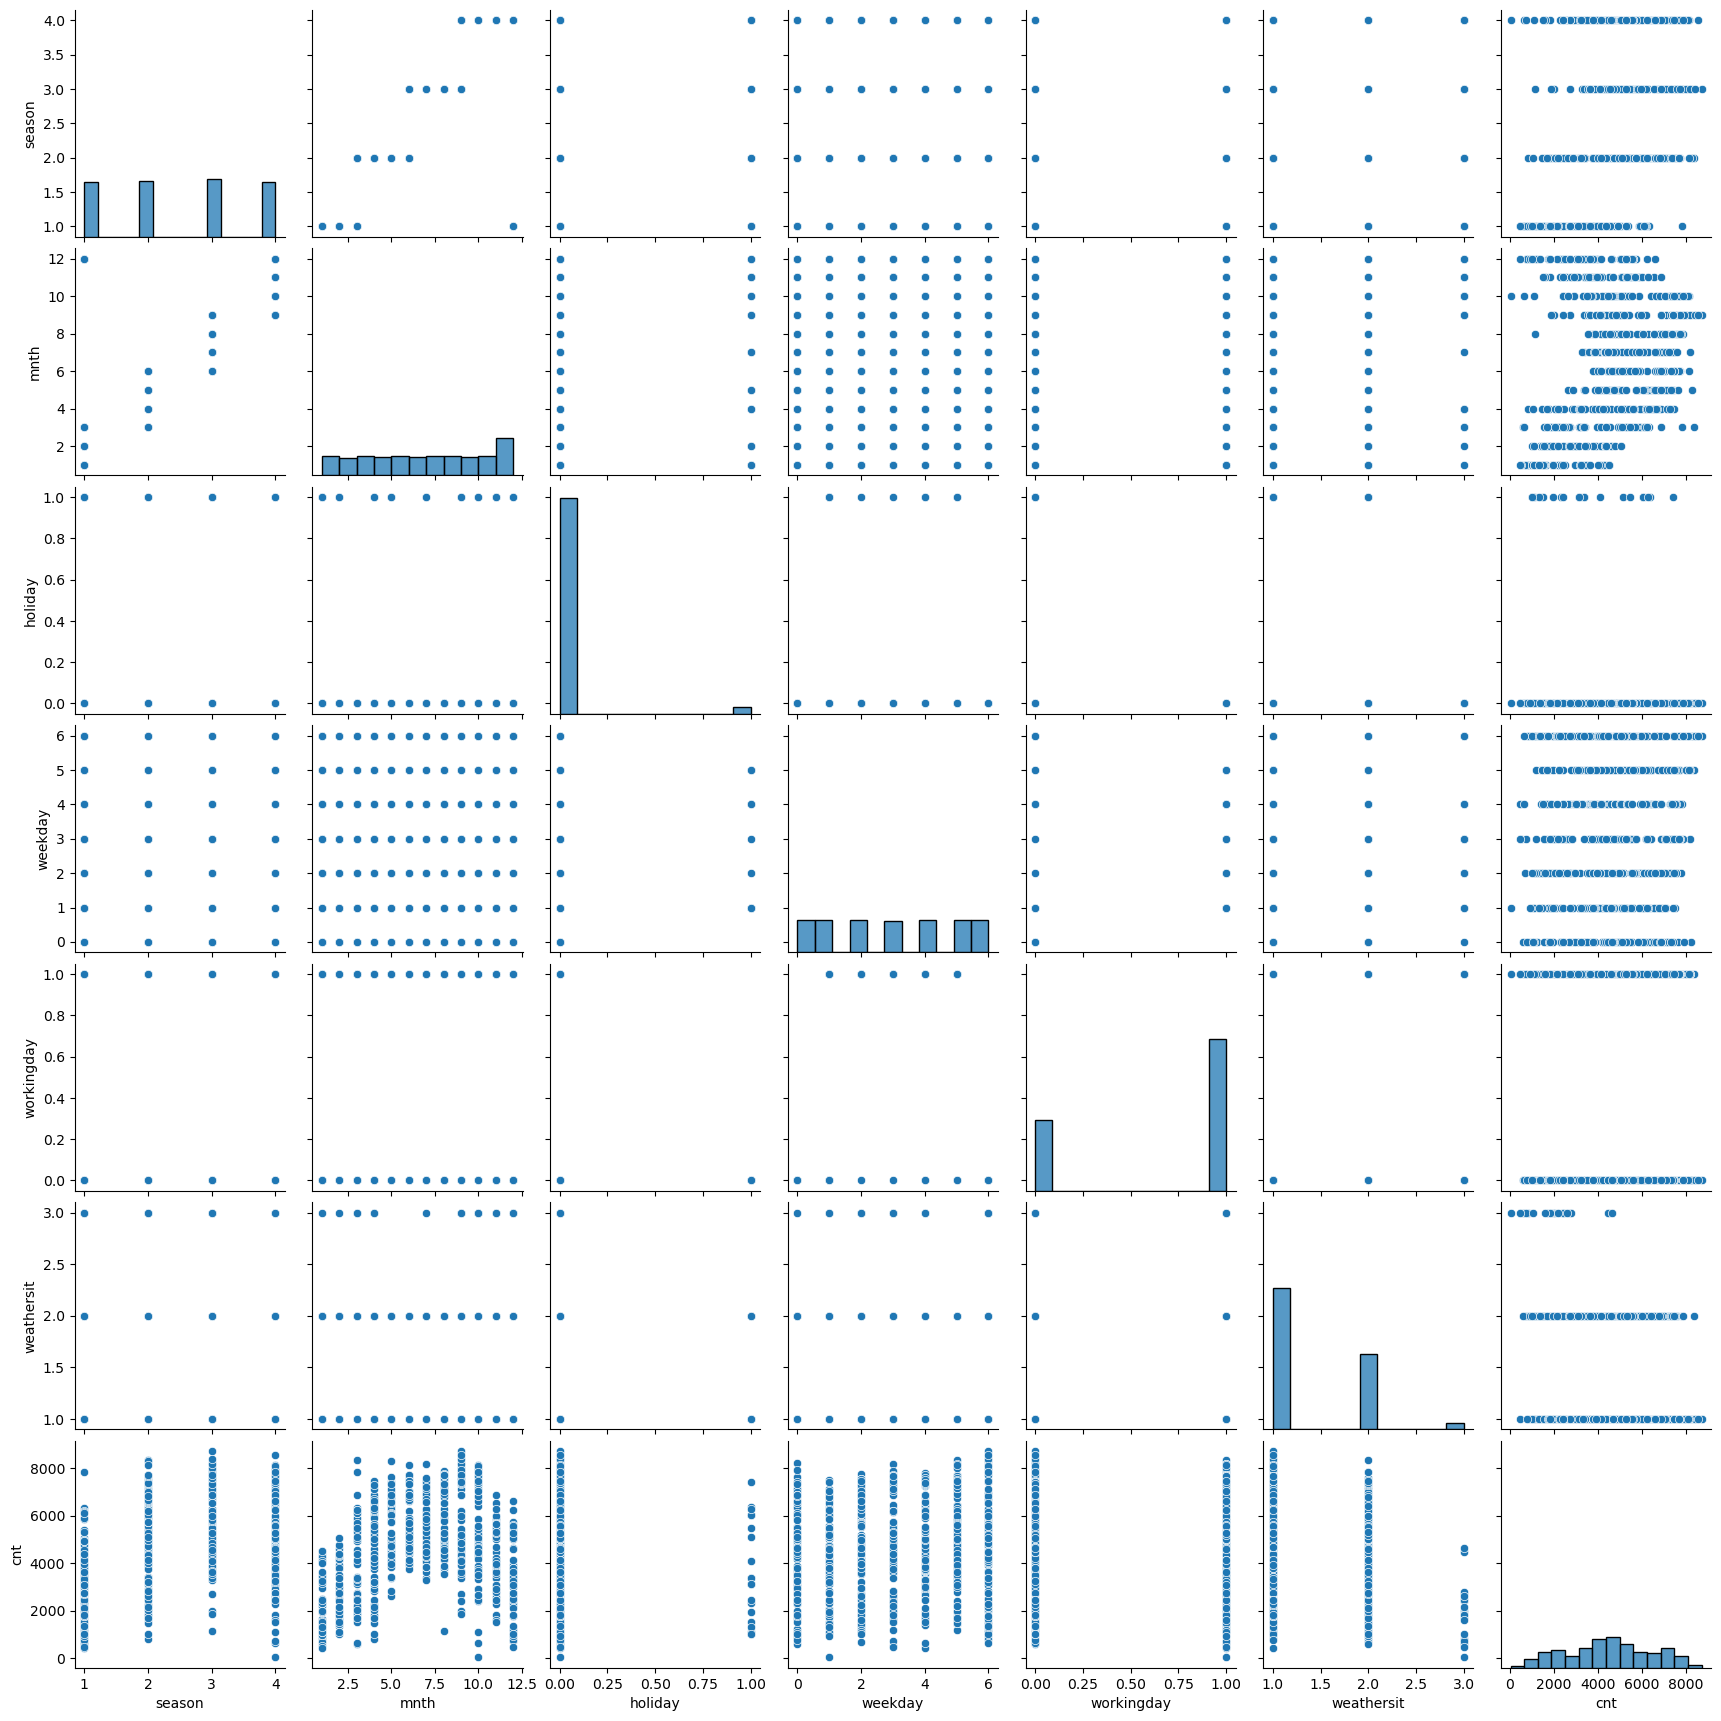

In [8]:
sns.pairplot(bike_data_df, vars=['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt'])
plt.show()

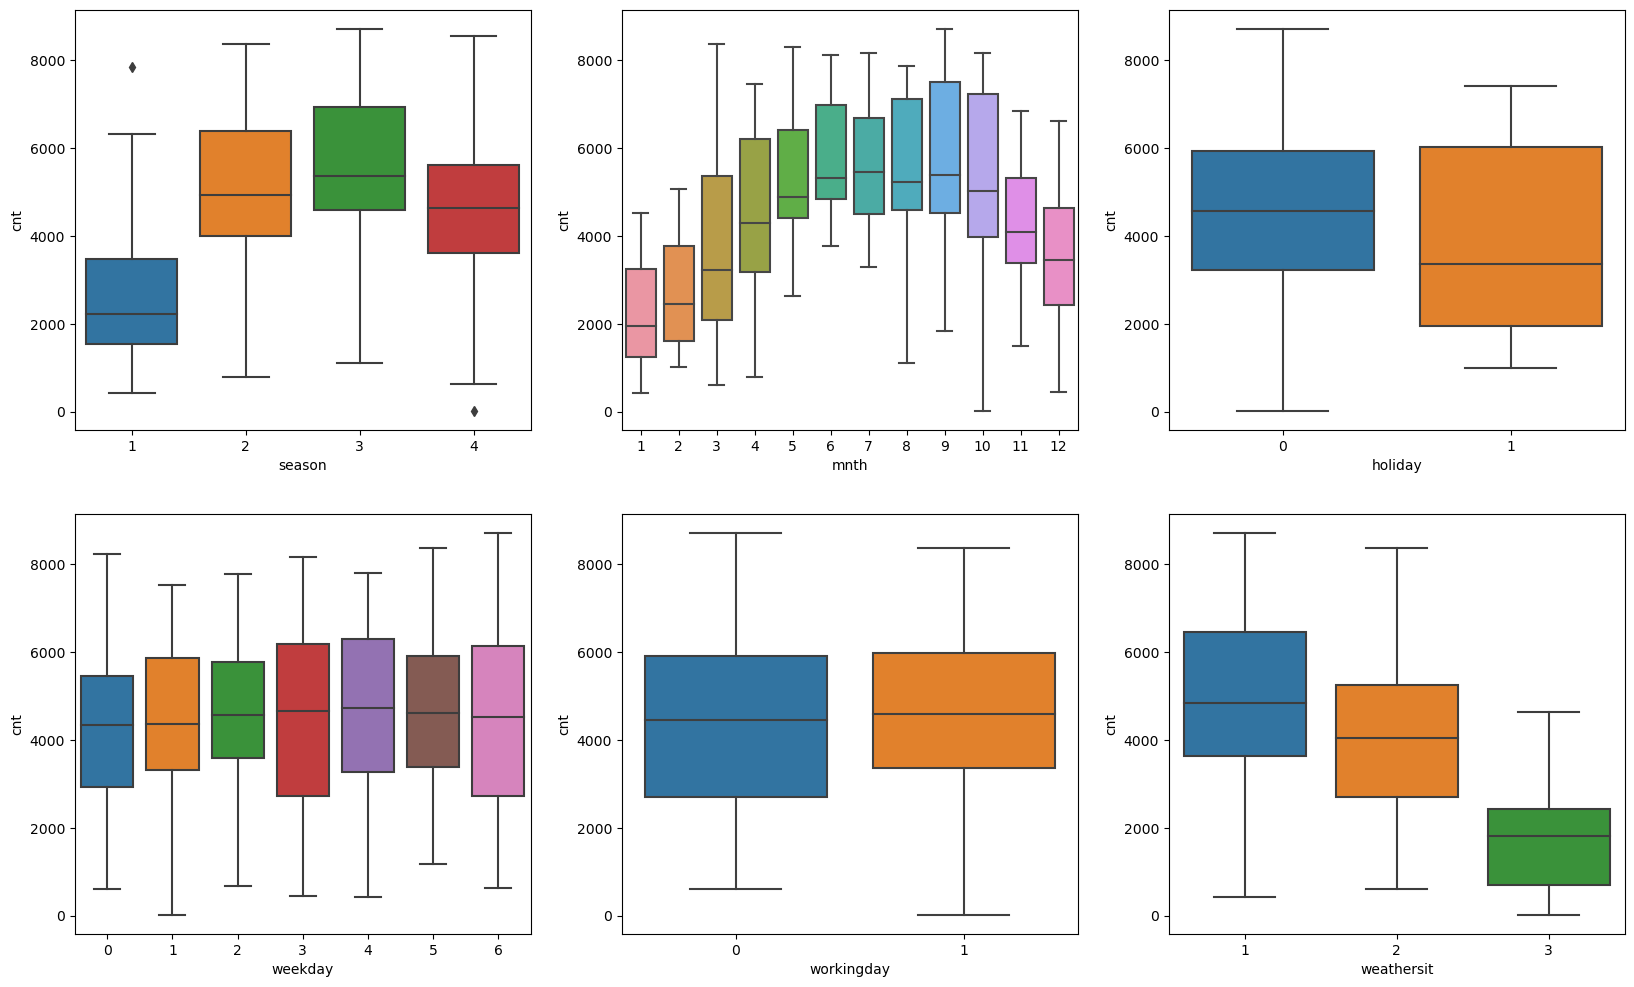

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data_df)
plt.show()

### Data transformations
derive date from the date object, Since we already have month and year in the dataset, just deriving date of month.

Drop `instant` and `dteday` columns, since instant is just an index of the dataset rows and doesn't hold any significance; dteday can be dropped because all the data in that column already exists/transformated to numerical columns so that it can be used in the regression model.


In [10]:
bike_data_df['date'] = bike_data_df.dteday.apply(lambda x: int(x[:2]))

bike_data_df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [11]:
bike_data_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Insights from EDA
1. The weather situation value is never 4, It can indicate either missing data or the weather was never type 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) in the recorded two years dataset.
2. Fall season seems to have the highest rentals across the season. Which also correlates to the corresponding months having higher rentals
3. There are more rentals recorded when the weather is clear
4. `temp` and `atemp` are highly correlated and have a good linear pattern with rentals.
5. There doesn't seem to be a linear relation in between humidiy, windspeed to the rentals recorded.

## Creating Dummies
`weathersit` and `season` needs to be conisdered as categorical values, since they don't have an order in the values provided.

In [12]:
weathersit = pd.get_dummies(bike_data_df['weathersit'], drop_first = True)
weathersit.columns = ['weather_cloudy', 'weather_snowy']
season = pd.get_dummies(bike_data_df['season'], drop_first = True)
season.columns = ['season_summer', 'season_fall', 'season_winter']

In [13]:
bike_data_df = pd.concat([bike_data_df, weathersit, season], axis = 1)
bike_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather_cloudy,weather_snowy,season_summer,season_fall,season_winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0,0,0,0


### Drop the original columns after creating dummies

In [14]:
bike_data_df.drop(['season', 'weathersit'], axis = 1, inplace = True)

### Drop other dependant vars
`casual` and `registered` columns just sum up to the outcome dependat variable `cnt`. They should ideally not be considered as independent variables because they are actually outcomes. As per the business statement they can't be used in the training data for X.

In [15]:
bike_data_wo_counts_df = bike_data_df.drop(['casual', 'registered'], axis = 1)

## Splitting the Data into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(999)
df_train, df_test = train_test_split(bike_data_wo_counts_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,date,weather_cloudy,weather_snowy,season_summer,season_fall,season_winter
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,7534,16,0,0,0,0,1
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,7216,31,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,4066,3,1,0,0,0,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1796,30,0,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,4220,28,1,0,1,0,0


## Visualizing training data correlations

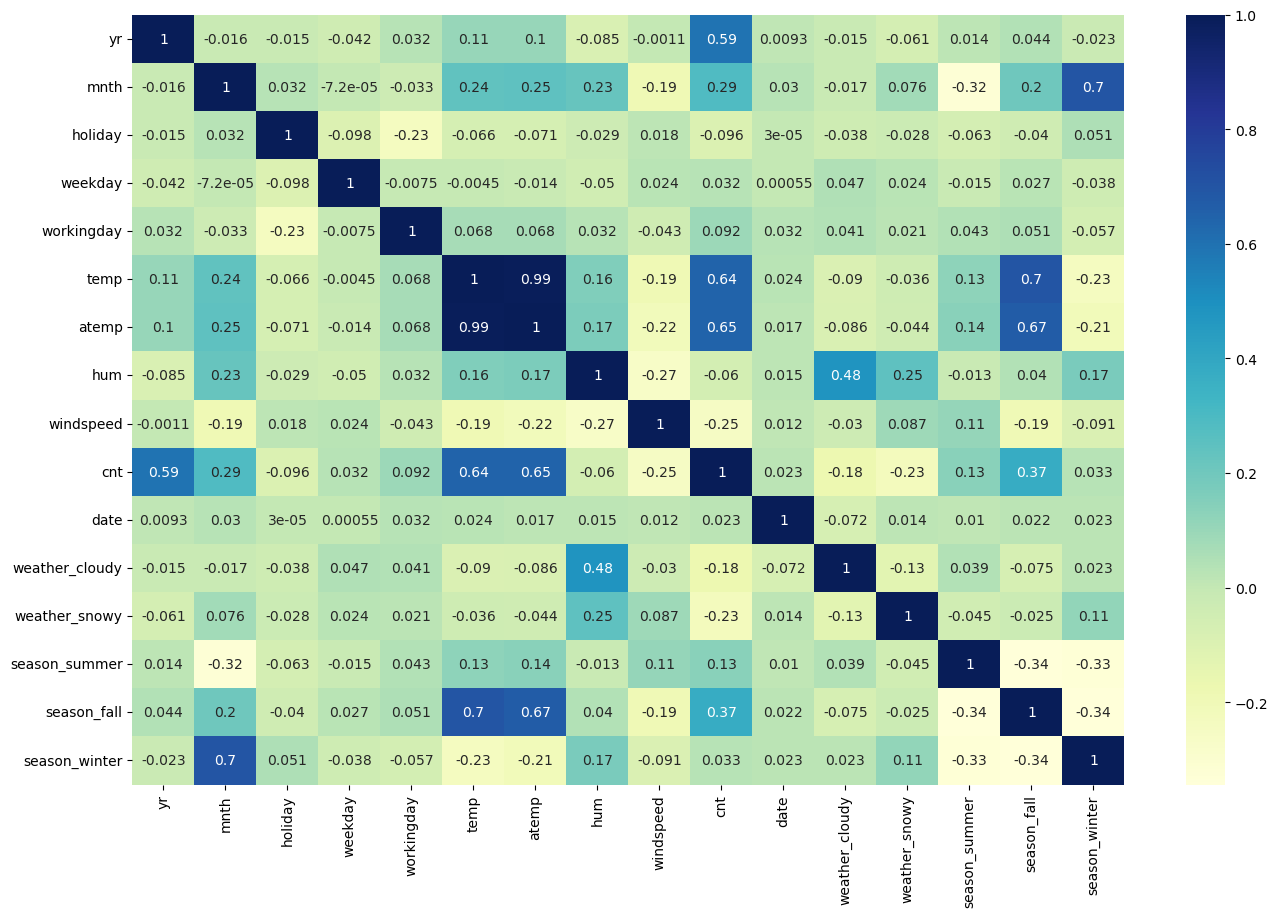

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building models

In [21]:
y_train = df_train.pop('cnt')
X_train = df_train

### Model - 1
Model with all training vars. 

In [22]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const             1517.675059
yr                2018.513206
mnth                 9.712000
holiday           -556.737162
weekday             70.463370
workingday         165.248995
temp              3812.602966
atemp              488.260191
hum              -1081.986050
windspeed        -1543.915662
date                -2.370055
weather_cloudy    -511.287341
weather_snowy    -2158.412030
season_summer     1011.208437
season_fall        615.722208
season_winter     1357.789871
dtype: float64

In [23]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.93e-181
Time:                        22:06:07   Log-Likelihood:                -4129.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     494   BIC:                             8359.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1517.6751    264.727      5.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,386.96
6,atemp,365.50
7,hum,20.32
1,mnth,17.52
13,season_fall,8.20
14,season_winter,7.16
8,windspeed,4.10
9,date,4.02
12,season_summer,3.53
4,workingday,3.16


### Model - 2
With all the vars from training dataset, the training data r-squared came out to be 0.834 which is pretty good for the way how the model is explaining the variance in the outcome rentals. but we can clearly see some insignificant vars from the model summary. `atemp` has a p-value of 0.693 and a VIF of 365. It can be good first candidate to drop and retrain a model

In [26]:
X_train = X_train.drop('atemp', axis=1,)

In [27]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [28]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.54e-182
Time:                        22:06:07   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1525.6510    263.732      5.

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,22.91
6,hum,19.91
1,mnth,17.51
12,season_fall,8.09
13,season_winter,7.15
8,date,4.01
7,windspeed,3.97
11,season_summer,3.53
4,workingday,3.16
3,weekday,3.05


### Model - 3
After removing `atemp` the r-squared value didn't change, but we can see the VIF for temp has reduced drastically. Next possible candidate is `mnth` with a p-value of 0.633 and VIF of 17.51

In [30]:
X_train = X_train.drop('mnth', axis=1)

In [31]:
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [32]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.22e-183
Time:                        22:06:07   Log-Likelihood:                -4129.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1543.3130    260.922      5.

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,22.82
5,hum,18.34
11,season_fall,6.49
7,date,4.01
6,windspeed,3.92
10,season_summer,3.37
3,workingday,3.16
2,weekday,3.02
12,season_winter,2.49
8,weather_cloudy,2.19


### Model - 4
After removing `mnth` the r-squared value didn't change either. Next possible candidate is `date` with a p-value of 0.538

In [34]:
X_train = X_train.drop('date', axis=1)

X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.00e-184
Time:                        22:06:07   Log-Likelihood:                -4130.0
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1514.5253    256.538      5.

### Model - 5
Since `temp` has a high VIF, trying out removing it too from the vars. 
This resulted in a lower r-squared. The higher VIF is most likely because of temperature being dependent on other vars like humidity, windspeed up to some extent. But they alone wouldn't be fully responsible for temp and thus the outcome rentals. So keeping all those is ok for achieving a higher r-squared on the model. 

In [35]:
X_train_1 = X_train.drop('temp', axis=1)

X_train_1_lm = sm.add_constant(X_train_1)
lr_5 = sm.OLS(y_train, X_train_1_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          5.31e-148
Time:                        22:06:07   Log-Likelihood:                -4219.8
No. Observations:                 510   AIC:                             8464.
Df Residuals:                     498   BIC:                             8514.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2084.2035    302.011      6.

## Residual analysis of stats models

<Figure size 640x480 with 0 Axes>

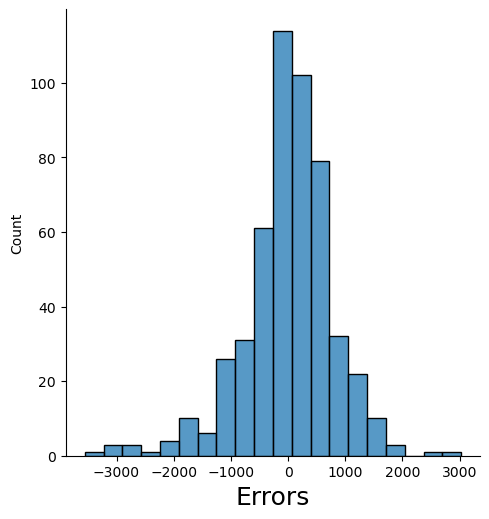

In [36]:
y_train_price = lr_4.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     # X-label
plt.show()

Plotting the errors is resulting in a normal distribution as expected for the linear regression model. 

### Scaling test data for predictions

In [37]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [38]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,date,weather_cloudy,weather_snowy,season_summer,season_fall,season_winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,4546.981735,16.018265,0.319635,0.027397,0.264840,0.246575,0.232877
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,1898.633630,8.575067,0.467403,0.163612,0.442259,0.432005,0.423633
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Making predictions

In [39]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test_m4 = sm.add_constant(X_test)

X_test_m4 = X_test_m4.drop(["mnth", "atemp", "date"], axis = 1)

In [40]:
y_pred_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

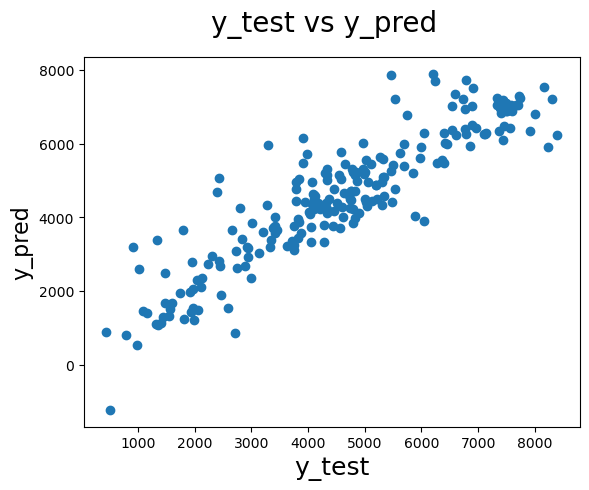

In [41]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

 ### Calcluate r-squared on test data

In [42]:
r2_score(y_test, y_pred_m4)

0.809095784884359

R-squared on the training data is `0.834` and on test data is `0.809`. This is a good close value with training data indicating the model can generalise for unseen data and not too overly fitting training data. 

## Building models via RFE

Validating our feature selection above by using RFE to randomly rank and select features. 

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weather_cloudy', True, 1),
 ('weather_snowy', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weather_cloudy',
       'weather_snowy', 'season_summer', 'season_fall', 'season_winter'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday'], dtype='object')

In [48]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          4.78e-183
Time:                        22:06:08   Log-Likelihood:                -4139.6
No. Observations:                 510   AIC:                             8301.
Df Residuals:                     499   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1915.4951    243.131      7.

RFE also produced a similar model like the stats model above with an r-square of `0.827`. With similar confidence intervals as well. 

### Making predictions

In [49]:
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)

y_pred_rfe = lm.predict(X_test_rfe)

 ### Calcluate r-squared on test data

In [50]:
r2_score(y_test, y_pred_rfe)

0.8063526208371379

R-squared on test data also fairly good and comparable to that of train data